In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_directory = "/content/drive/MyDrive/Dataset/Rubber_Trunk/"

In [ ]:
ls "/content/drive/MyDrive/Dataset/Rubber_Trunk/"

'healthy trunk'/  'unhealthy trunk'/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # split the dataset into training and validation sets
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Load the images and their labels from the subdirectories
dataset_path = '/content/drive/MyDrive/Dataset/Rubber_Trunk/'
image_size = (224, 224)  # set the size of the input images
batch_size = 32  # set the batch size for training
train_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # use the 'training' subset for training
)
validation_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # use the 'validation' subset for validation
)
test_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the data for accurate predictions
)


Found 807 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.


In [ ]:
import os
class_names = os.listdir(dataset_path)
print(class_names)

['healthy trunk', 'unhealthy trunk']


In [ ]:
from collections import Counter

counter = Counter(train_generator.classes)

print(counter.items())

dict_items([(0, 406), (1, 401)])


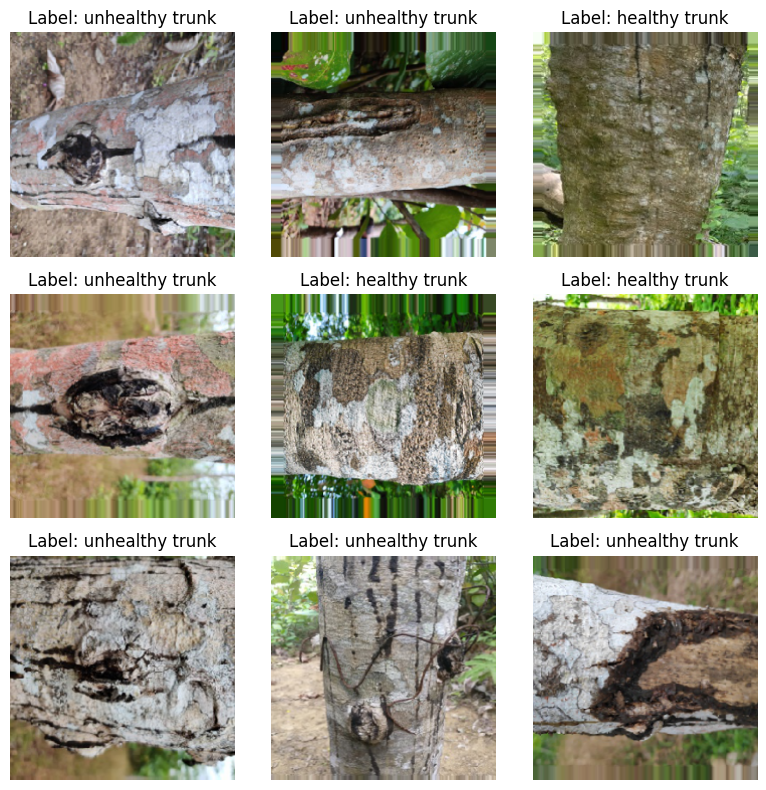

In [ ]:
class_names = train_generator.class_indices
class_names = dict((v, k) for k, v in class_names.items())  # Swap keys and values in the dictionary

# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axs = axs.flatten()

for i in range(9):
    img = images[i]
    label = class_names[np.argmax(labels[i])]  # Get the class name using the updated class_names dictionary
    axs[i].imshow(img)
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')

plt.tight_layout()

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Add fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming 3 classes for leaf identification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Print the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30  # Number of training epochs
)

Epoch 1/30
26/26 [==============================] - 161s 6s/step - loss: 0.9228 - accuracy: 0.5750 - val_loss: 0.7141 - val_accuracy: 0.5323
Epoch 2/30
26/26 [==============================] - 105s 4s/step - loss: 0.5770 - accuracy: 0.7088 - val_loss: 0.4821 - val_accuracy: 0.7015
Epoch 3/30
26/26 [==============================] - 108s 4s/step - loss: 0.4059 - accuracy: 0.8265 - val_loss: 0.4218 - val_accuracy: 0.8209
Epoch 4/30
26/26 [==============================] - 108s 4s/step - loss: 0.3418 - accuracy: 0.8637 - val_loss: 0.2929 - val_accuracy: 0.9254
Epoch 5/30
26/26 [==============================] - 108s 4s/step - loss: 0.3083 - accuracy: 0.8848 - val_loss: 0.3776 - val_accuracy: 0.7960
Epoch 6/30
26/26 [==============================] - 108s 4s/step - loss: 0.2845 - accuracy: 0.8922 - val_loss: 0.3211 - val_accuracy: 0.9005
Epoch 7/30
26/26 [==============================] - 107s 4s/step - loss: 0.2544 - accuracy: 0.9021 - val_loss: 0.1508 - val_accuracy: 0.9602
Epoch 8/30
26

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

32/32 [==============================] - 46s 1s/step - loss: 0.0768 - accuracy: 0.9802
Test Loss: 0.07680411636829376
Test Accuracy: 0.9801587462425232


In [ ]:
model.save('/content/drive/MyDrive/Dataset/Rubber_trunk_diseases_latest.h5')

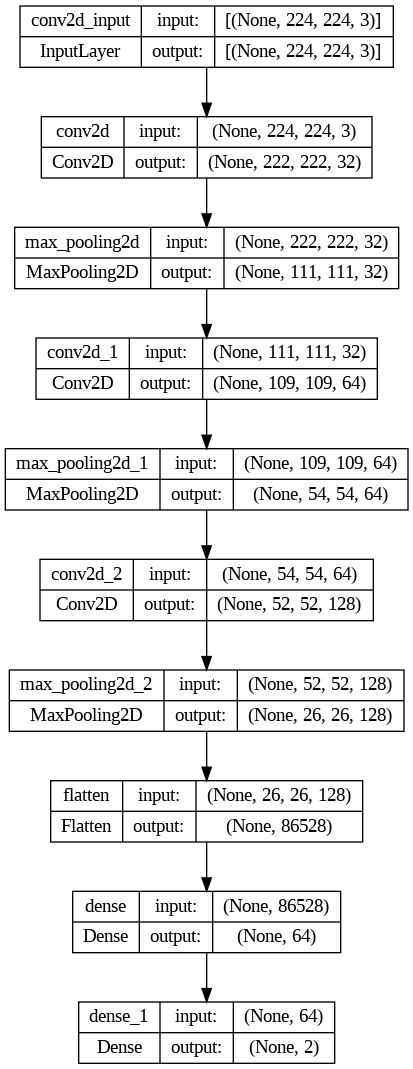

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
from sklearn.metrics import classification_report

# Get the predictions for the test data
predictions = model.predict(test_generator)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual class indices
actual_classes = test_generator.classes

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
print(classification_report(actual_classes, predicted_classes, target_names=class_labels))

32/32 [==============================] - 56s 2s/step
                 precision    recall  f1-score   support

  healthy trunk       0.96      0.99      0.98       507
unhealthy trunk       0.99      0.96      0.97       501

       accuracy                           0.98      1008
      macro avg       0.98      0.98      0.98      1008
   weighted avg       0.98      0.98      0.98      1008



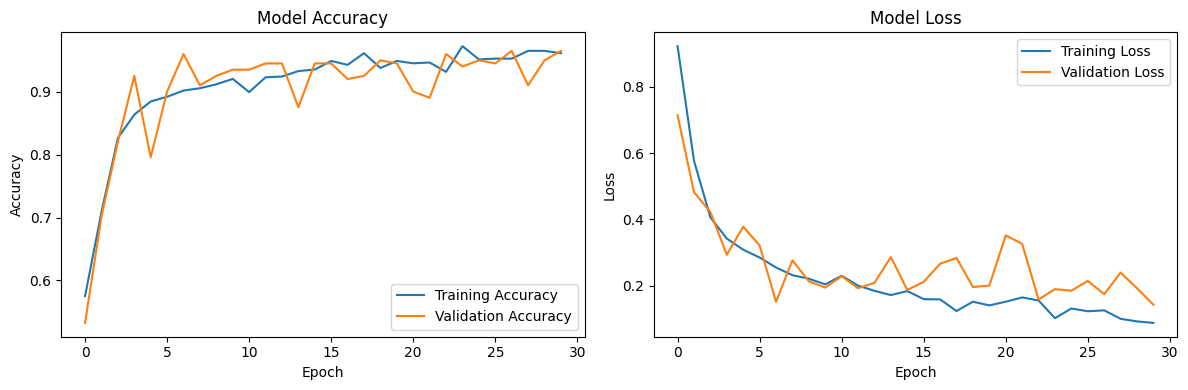

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')

# Plot the training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

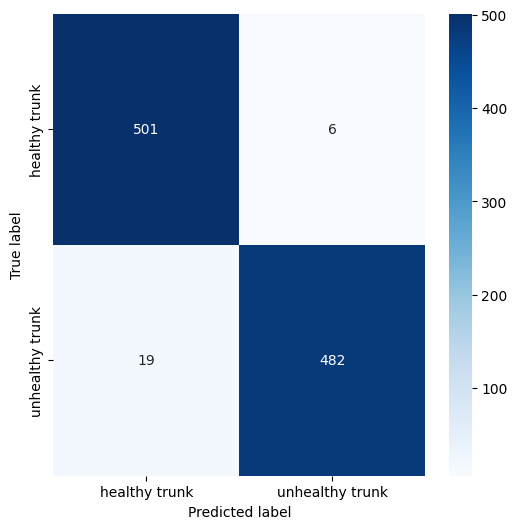

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true class indices
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

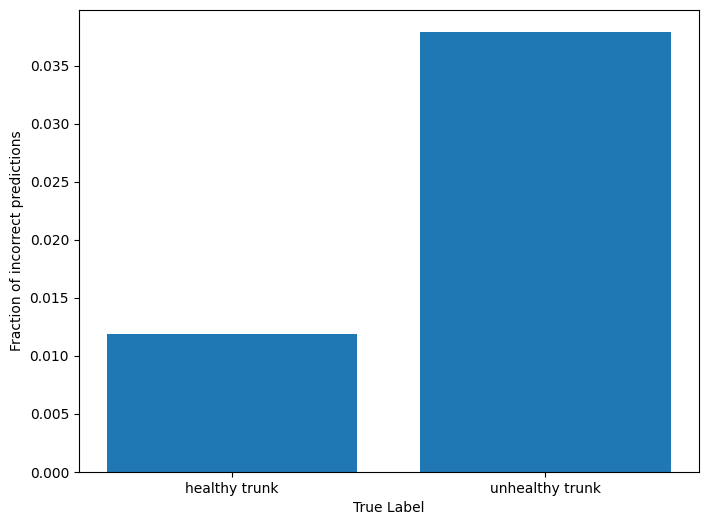

In [ ]:
# Calculate the fraction of incorrect predictions for each class
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

# Plot the fraction of incorrect predictions
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(np.arange(len(class_labels)), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(len(class_labels)), class_labels) 
plt.show()